# Image Classification with MNIST

In that project I will try to train a model, that can predict MNIST dataset's images.

In [1]:
#Importing dataset and libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
#Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

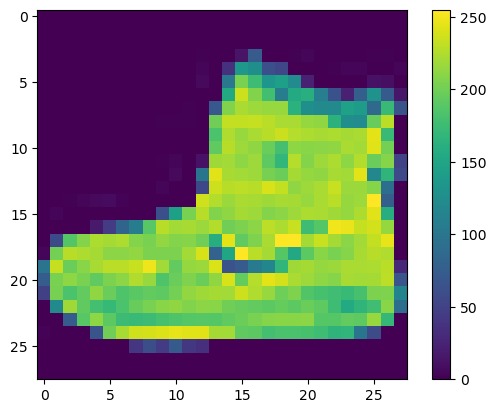

In [2]:
#You can see here, that the dataset is not normalized
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [3]:
#Normalizing
train_images = train_images / 255.0
test_images = test_images / 255.0

<img src=https://cdn.educba.com/academy/wp-content/uploads/2019/05/Normalization-Formula.jpg width=400>

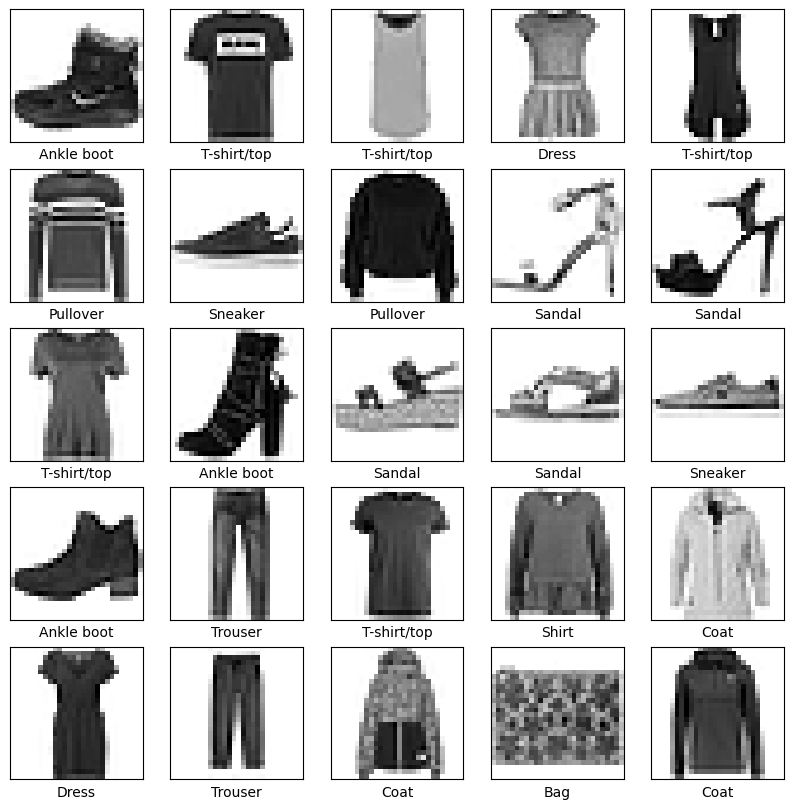

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Modelling

In [8]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, Reshape, MaxPooling2D, Flatten

In [10]:
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10, activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7901 - loss: 0.5861 - val_accuracy: 0.8762 - val_loss: 0.3413
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8911 - loss: 0.3056 - val_accuracy: 0.8910 - val_loss: 0.3055
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9015 - loss: 0.2676 - val_accuracy: 0.8926 - val_loss: 0.2898
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9135 - loss: 0.2334 - val_accuracy: 0.9025 - val_loss: 0.2819
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9208 - loss: 0.2143 - val_accuracy: 0.9012 - val_loss: 0.2748
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9270 - loss: 0.1962 - val_accuracy: 0.9039 - val_loss: 0.2684
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9333 - loss: 0.1864 - val_accuracy: 0.9014 - val_loss: 0.2909
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9349 -

In [13]:
model.save('my_model.h5')

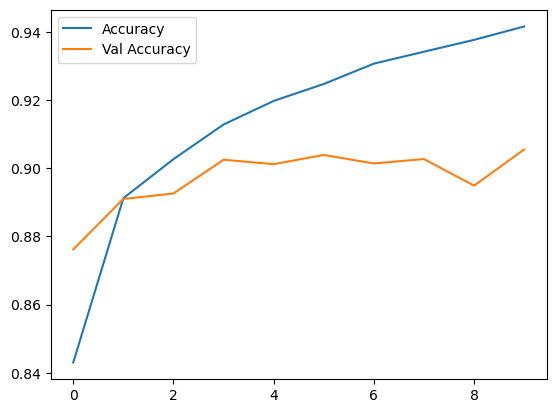

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Val Accuracy")
plt.legend();

You can see from above that the model isn't overfitted. But metrics are not sufficient to evaluate the model. That's why I will make a Streamlit app. You can find it in <a href="https://huggingface.co/emirkaanozdemr">Hugging Face</a>.